# Amostragem

Renato Naville Watanabe

## Preparação do ambiente

In [2]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

In [3]:
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.signal import bode
%matplotlib widget

## Definição

Aqui vamos fazer a ligação entre domínio de tempo contínuo com o domínio de tempo discreto. Nos dias de hoje, praticamente todo processamento de sinais é feito com o auxílio de computadores. Computadores, como é bem conhecido, guarda apenas uma quantidade finita de informação. Quando se trata de sinais, isso quer dizer que quando trabalhamos com sinais utilizado computadores, não é possível armazenar todos os valores do sinal. São armazenados apenas alguns valores. Ou seja, ao trabalharmos com computadores, somos obrigados a trabalhar em tempo discreto. Por isso é importante saber em que condições podemos passar um sinal de tempo contínuo para tempo discreto.  Para exemplificar vamos considerar o seguinte sinal:

$x(t) = \cos(2\pi t)$

Esse sinal tem o seguinte gráfico:

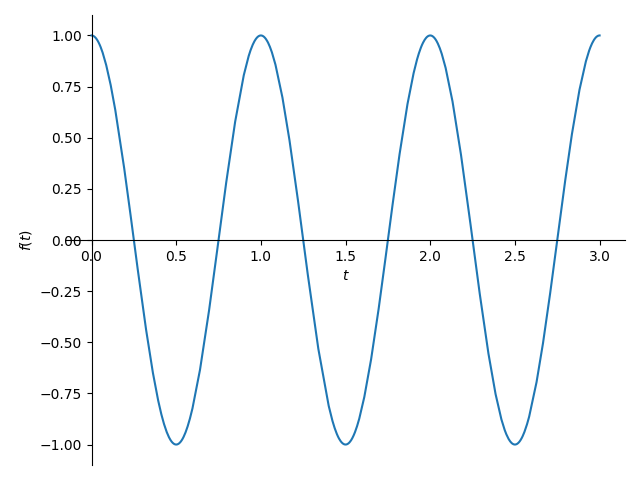

In [8]:
t = sym.symbols('t')
sym.plot(sym.cos(2*np.pi*t), (t, 0,3))

Ao discretizarmos o sinal, vamos pegar apenas alguns pontos do sinal original.

$x[n] = x(nT_s)$

em que $T_s$ é uma constante conhecida como **período de amostragem**. Por exemplo, se escolhermos $T_s=0.1$ s, o sinal $x[n]$ fica como indicado no gráfico abaixo (no gráfico abaixo, a linha contínua é o sinal no tempo contínuo e o sinal em tempo discreto é mostrado com barras):

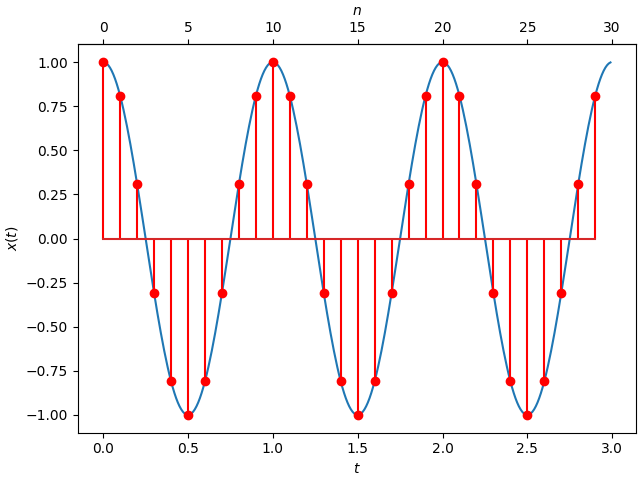

In [55]:
n = np.arange(30)
t = np.arange(0, 300)*0.01
Ts = 0.1
xd = np.cos(2*np.pi*n*Ts)
xc = np.cos(2*np.pi*t)
# Create some mock data
fig, ax = plt.subplots(layout='constrained')
ax.plot(t, xc)
ax.stem(n*Ts, xd, 'r')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')

def time2n(x):
    return x /Ts


def n2time(x):
    return x * Ts


secax = ax.secondary_xaxis('top', functions=(time2n, n2time))
secax.set_xlabel('$n$')
plt.show()

Note que existe uma correspondência entre o tempo discreto $n$ e o tempo contínuo $t$:

$t = n\cdot Ts$


Perceba que se olharmos apenas o sinal de tempo discreto, podemos reconstruir na nossa cabeça o cosseno original. Isso não acontece se utilizarmos, por exemplo $T_s=0.7$ s:

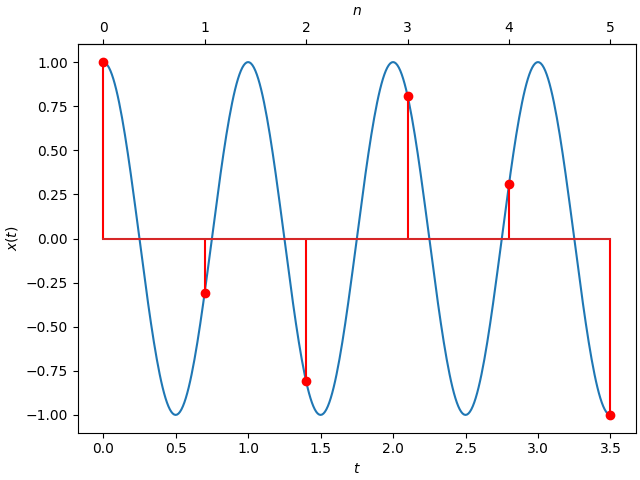

In [61]:
n = np.arange(6)
t = np.arange(0, 350)*0.01
Ts = 0.7
xd = np.cos(2*np.pi*n*Ts)
xc = np.cos(2*np.pi*t)
# Create some mock data
fig, ax = plt.subplots(layout='constrained')
ax.plot(t, xc)
ax.stem(n*Ts, xd, 'r')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')

def time2n(x):
    return x /Ts


def n2time(x):
    return x * Ts


secax = ax.secondary_xaxis('top', functions=(time2n, n2time))
secax.set_xlabel('$n$')
plt.show()

Ao tentar reconstruir um cosseno a partir do sinal de tempo discreto, imaginamos um cosseno bem mais lento do que o do sinal original. Então a pergunta é: *qual o período de amostragem máximo que podemos usar para discretizar um sinal de tempo contínuo de forma que após a discretização podemos obter de volta o sinal de tempo contínuo?* Normalmente, essa pergunta é feita em termos de outra grandeza que não o período de amostragem: a **frequência de amostragem**, definida como:

$f_s = \frac{1}{T_s}$.

Então a pergunta é: *qual a frequência de amostragem mínima que podemos usar para discretizar um sinal de tempo contínuo de forma que após a discretização podemos obter de volta o sinal de tempo contínuo?* Isso é respondido com o teorema de Nyquist.

## Teorema de Nyquist

O **teorema de Nyquist**, também conhecido como **teorema da amostragem** ou **teorema de Shannon** responde a pergunta do final da seção anterior.

Vamos começar com um sinal $x(t)$ que queremos discretizar. Consideramos que o espectro desse sinal $x(t)$, $X(j\omega)$ tem uma banda limitada $B$ Hz. Isso significa que o espectro de $x(t)$ é igual a zero para $|\omega|>2\pi B$, como por exemplo o espectro mostrado no gráfico abaxo:

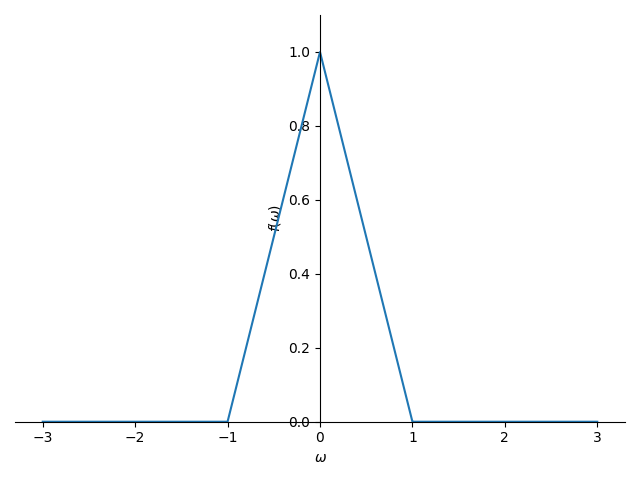

In [124]:
omega = sym.symbols('\omega')
B = 1
H = (1-omega)*(sym.Heaviside(omega)-sym.Heaviside(omega-1)) + (1+omega)*(sym.Heaviside(omega+1)-sym.Heaviside(omega))
p1=sym.plot(H, (omega, -3, 3), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-B, B])
ax.set_xticklabels([r'$-2\pi B$', r'$2\pi B$'])
ax.set_yticks([])
ax.set_yticklabels([])
fig.canvas.draw_idle()

Uma forma de vermos a discretização de um sinal de tempo contínuo é como a multiplicação do sinal $x(t)$ por um trem de impulsos com período $T_s$ ($\Delta_{T_s}(t)$), como exemplificado na figura abaixo:

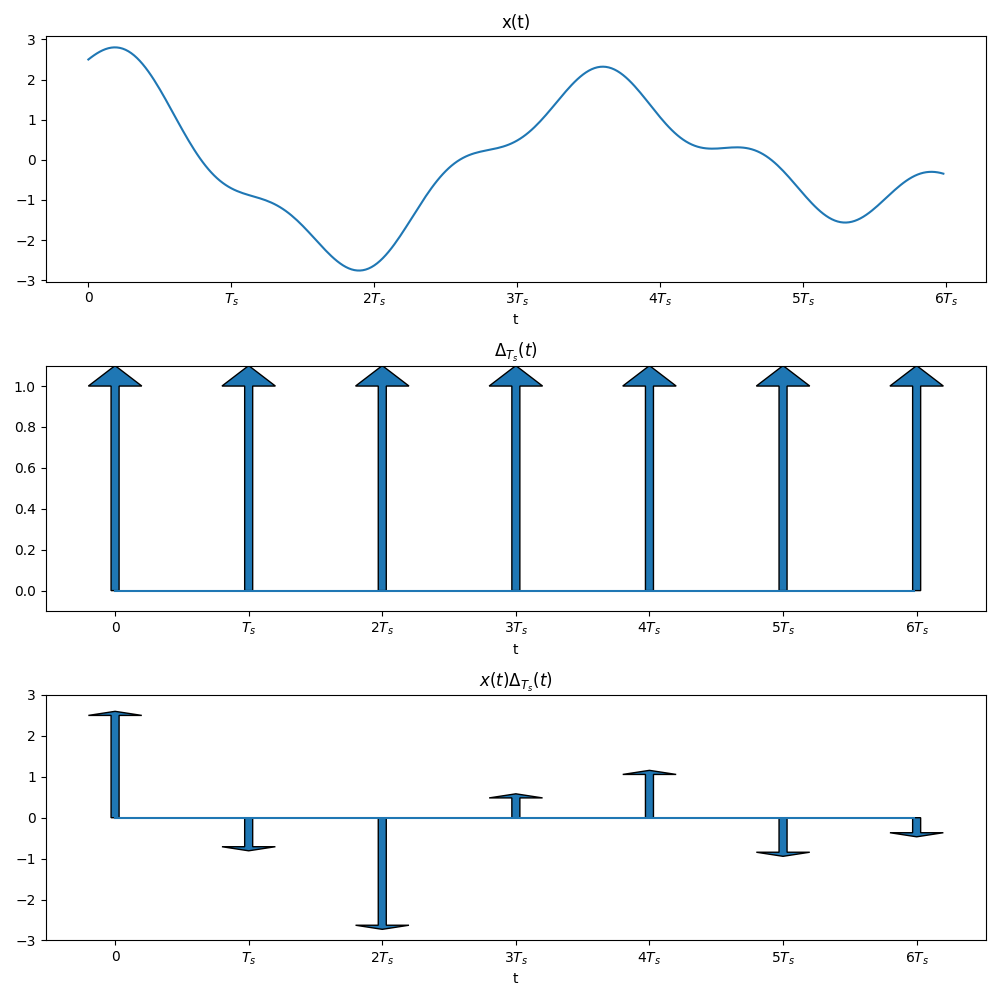

In [109]:
t = np.arange(300)*0.01
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(t, np.cos(4*t)+1.5*np.cos(np.pi*t)+0.5*np.sin(8*np.sqrt(2)*t))
plt.title('x(t)')
plt.xticks([0, 0.5,1,1.5, 2, 2.5, 3], ['0', '$T_s$', '$2T_s$','$3T_s$', '$4T_s$','$5T_s$', '$6T_s$'])
plt.xlabel('t')
plt.subplot(3,1,2)
plt.plot(t, 0*t)
for i in range(7):
    plt.arrow(0.5*i,0,0,1,width=0.03, head_width = 0.2, head_length=0.1)
plt.xticks([0, 0.5,1,1.5, 2, 2.5, 3], ['0', '$T_s$', '$2T_s$','$3T_s$', '$4T_s$','$5T_s$', '$6T_s$'])

plt.ylim(-0.1, 1.1)
plt.xlabel('t')
plt.title('$\Delta_{T_s}(t)$')
plt.subplot(3,1,3)
plt.plot(t, 0*t)
for i in range(7):
    plt.arrow(0.5*i,0,0,np.cos(4*i*0.5)+1.5*np.cos(np.pi*i*0.5)+0.5*np.sin(8*np.sqrt(2)*i*0.5),width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-3, 3)
plt.xlabel('t')
plt.xticks([0, 0.5,1,1.5, 2, 2.5, 3], ['0', '$T_s$', '$2T_s$','$3T_s$', '$4T_s$','$5T_s$', '$6T_s$'])
plt.title('$x(t)\Delta_{T_s}(t)$')
plt.tight_layout(pad=1.0)
plt.show()

Após a multiplicação de $x(t)$ pelo trem de impulsos $\Delta_{T_s}(t)$ temos:

$x_a(t) = x(t)\Delta_{T_s}(t)$

O sinal $x_a(t)$ é uma multiplicação de dois sinais. Logo o espectro de $x_a(t)$ é a convolução entre os espectros de $x_a(t)$ e $\Delta_{T_s}(t)$:

$X_a(j\omega) = \frac{1}{2\pi}X(j\omega)*\Lambda(j\omega)$

em que $\Lambda(j\omega)$ é a transformada de Fourier do trem de impulsos.

Aqui estamos supondo que conhecemos $X(j\omega)$. Resta saber a transformada de Fourier do trem de impulsos. O trem de impulsos é um sinal periódico de período $T_s$. Então precisamos calcular a série de Fourier do sinal. O trem de impulsos $\Delta_{T_s}(t)$ é escrito como:

$\Delta_{T_s}(t) = \displaystyle\sum_{n=-\infty}^\infty \delta(t-nT_s)$

Então a sua série de Fourier é:

$a_k = \displaystyle\frac{1}{T_s}\int_{T_s}\Delta_{T_s}(t)e^{-jk\frac{2\pi}{T_s}t}\,dt = \frac{1}{T_s}\int_{T_s}\sum_{n=-\infty}^\infty \delta(t-nT_s)e^{-jk\frac{2\pi}{T_s}t}\,dt=\frac{1}{T_s}\int_{T_s}\displaystyle\sum_{n=-\infty}^\infty \delta(t-nT_s)e^{-jk\frac{2\pi}{T_s}nT_s}\,dt = \frac{1}{T_s}\int_{T_s}\displaystyle\sum_{n=-\infty}^\infty \delta(t-nT_s)e^{-jk2\pi n}\,dt$

A exponencial $e^{-jk2\pi n}$ que aparece dentro da integral é sempre igual a 1, já que o seu expoente sempre será multiplo de $2\pi$. Então:

$a_k = \frac{1}{T_s}\int_{T_s}\displaystyle\sum_{n=-\infty}^\infty \delta(t-nT_s)\,dt = \frac{1}{T_s}$

Usando a expressão de síntese da série de Fourier, podemos escrever o trem de impulsos como:

$\Delta_{T_s}(t) = \displaystyle\sum_{k=-\infty}^{\infty}\frac{1}{T_s}e^{jk2\pi f_s t}$

Então, a transformada de Fourier de $\Delta_{T_s}(t)$ é:

$\Lambda(j\omega) = \displaystyle\sum_{k=-\infty}^{\infty}\frac{1}{T_s}\delta(\omega-k2\pi f_s)$


Ou seja, a transformada de Fourier de um trem de impulsos é um trem de impulsos, com os pulsos espaçados de $2\pi f_s$.

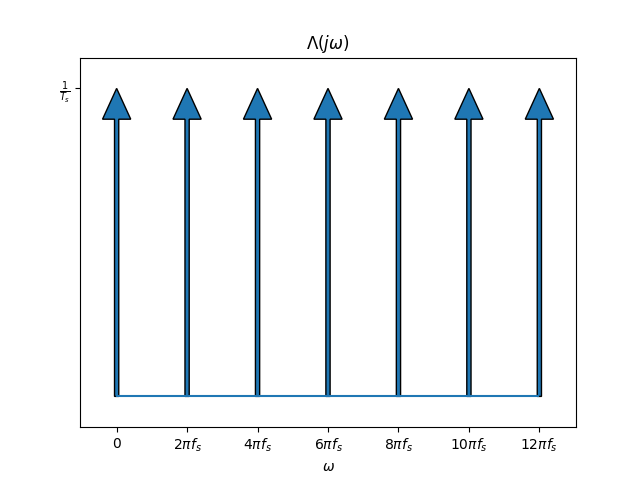

In [114]:
omega = np.arange(0, 300)*0.01
plt.figure()
plt.plot(omega, 0*omega)
for i in range(7):
    plt.arrow(0.5*i,0,0,1-0.1,width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('$\omega$')
plt.title('$\Lambda(j\omega)$')
plt.xticks([0, 0.5,1,1.5, 2, 2.5, 3], ['0', r'$2\pi f_s$', r'$4\pi f_s$',r'$6\pi f_s$', 
                                       r'$8\pi f_s$',r'$10\pi f_s$', r'$12\pi f_s$'])
plt.yticks([1], [r'$\frac{1}{T_s}$'])
plt.show()

A convolução de $X(j\omega)$ com um impulso irá deslocar $X(j\omega)$ para ficar centrado na frequência daquele impulso. Então, a convolução com um trem de impulsos irá fazer com que o espectro da multiplicação de $x(t)$ com o trem de impulsos seja $X(j\omega)$ repetido a cada $2\pi f_s$ rad/s, multiplicado por \frac{1}{2\pi T_s}:

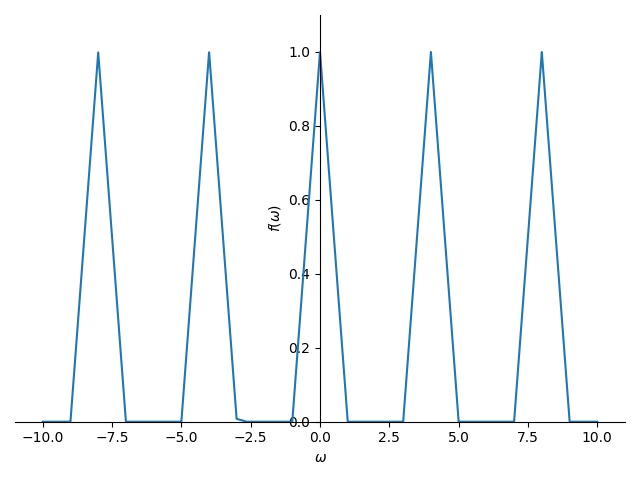

In [123]:
omega = sym.symbols('\omega')
B = 1
H = (1-omega)*(sym.Heaviside(omega)-sym.Heaviside(omega-1)) + (1+omega)*(sym.Heaviside(omega+1)-sym.Heaviside(omega))
p1=sym.plot(H+H.subs(omega, omega-4)+H.subs(omega, omega-8)+H.subs(omega, omega+4)+H.subs(omega, omega+8), (omega, -10, 10), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-8, -4, 0, 4, 8])
ax.set_xticklabels([r'$-4\pi f_s$', r'$-2\pi f_s$', r'$0$', r'$2\pi f_s$', r'$4\pi f_s$'])
ax.set_yticks([1])
ax.set_yticklabels([r'$\frac{1}{2\pi T_s}$'])
fig.canvas.draw_idle()

Perceba que existe um espaço entre as repetições de $X(j\omega)$. Isso só vai acontecer se $fs>2B$. 

Nesse caso, se quisermos recuperar o sinal original, basta fazer a convolução desse sinal por um filtro passa-baixa com uma frequência de corte maior do que $B$ e menor do que $f_s-B$.

Caso $fs<2B$, o espectro resultante da multiplicação será:

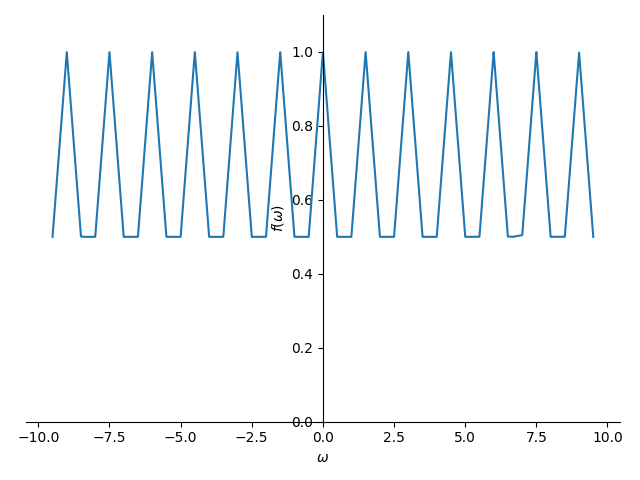

In [130]:
omega = sym.symbols('\omega')
B = 1
H = (1-omega)*(sym.Heaviside(omega)-sym.Heaviside(omega-1)) + (1+omega)*(sym.Heaviside(omega+1)-sym.Heaviside(omega))
p1=sym.plot(H+H.subs(omega, omega-1.5)+H.subs(omega, omega-3)+
            H.subs(omega, omega+1.5)+H.subs(omega, omega+3)+
            H.subs(omega, omega+4.5)+H.subs(omega, omega-4.5)+
            H.subs(omega, omega+6)+H.subs(omega, omega-6)+
            H.subs(omega, omega+7.5)+H.subs(omega, omega-7.5)+
            H.subs(omega, omega+9)+H.subs(omega, omega-9)+
            H.subs(omega, omega+11.5)+H.subs(omega, omega-11.5)+
            H.subs(omega, omega+13)+H.subs(omega, omega-13), (omega, -9.5, 9.5), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-8, -4, 0, 4, 8])
ax.set_xticklabels([r'$-4\pi f_s$', r'$-2\pi f_s$', r'$0$', r'$2\pi f_s$', r'$4\pi f_s$'])
ax.set_yticks([1])
ax.set_yticklabels([r'$\frac{1}{2\pi T_s}$'])
fig.canvas.draw_idle()

Nesse caso existe uma sobreposição dos espectros. Isso impede que consigamos recuperar o sinal  original, fazendo com que o sinal original esteja completamente perdido. 

Resumindo, o teorema de Nyquist diz que a frequência de amostragem para discretizar um sinal deve ser maior do que o dobro da maior frequência que o espectro do sinal tem.

$\boxed{fs>2B}$.

O valor $2B$ é conhecido como a **frequência de Nyquist**.

Caso a frequência de amostragem seja menor ou igual à frequência de Nyquist irá ocorrer um fenômeno conhecido como aliasing.

## Aliasing

O fenômeno do ***aliasing*** ou **rebatimento** ocorre quando 

## Exercícios

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007



In [59]:
0.7*4

2.8